## Searching for a regression model for Critical Temperature

In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
data = pd.read_csv("SC_data_elem_wt.csv")

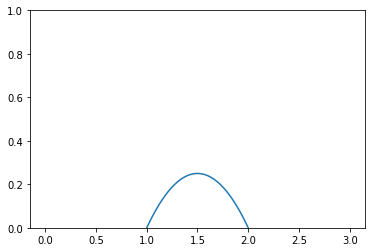

In [11]:
x=np.linspace(0,3,100)
y=(x-1)*(x-2)*-1
plt.figure()
plt.ylim(0,1)
plt.plot(x,y)
plt.show()

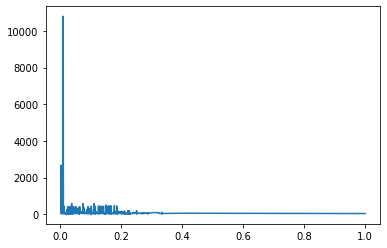

In [44]:

symbols = [col for col in data if col.endswith('_x')]
datum = data
datum["x_sum"] = 0.0
for symbol in symbols:
    datum["x_sum"] += datum[symbol]
    datum[symbol+"_p"] = 0.0
for symbol in symbols:
    datum[symbol+"_p"] = datum[symbol]/datum["x_sum"]

i=0
datum = datum.sort_values(symbols[i]+"_p")
plt.figure()
plt.plot(datum[datum[symbols[i]+"_p"]>0][symbols[i]+"_p"],datum[datum[symbols[i]+"_p"]>0]["Average Z"])
plt.show()

In [58]:
data_tmp = data[data["Critical Temperature"]>0]

In [59]:
data_tmp = data_tmp[data_tmp["Critical Temperature"]<100]

In [60]:
symbols = [col for col in data_tmp if col.endswith('_x')]
sums = {}
for symbol in symbols:
    sums[symbol] = np.sum(data_tmp[symbol])
    if sums[symbol] == 0:
        print(symbol)


Po_x
Cm_x


In [69]:
data_tmp_2 = data[data["Critical Temperature"]==0]

In [68]:
data_tmp_2[data_tmp_2["Compound"].str.contains("Cm")]

Compound  Critical Temperature  Sr_x  Nd_x  Cu_x  O_x  \
896   Pb2Sr2Cm0.5Ca0.5Cu3O8                   0.0   2.0   0.0   3.0  8.0   
1146         Pb2Sr2Cm1Cu3O8                   0.0   2.0   0.0   3.0  8.0   
2657               Cm2Cu1O4                   0.0   0.0   0.0   1.0  4.0   
3102      Cm1.85Th0.15Cu1O4                   0.0   0.0   0.0   1.0  4.0   

      Fe_x  As_x  F_x  Pr_x  ...  Ag_x_p  T_x_p  I_x_p  Tc_x_p    Cm_x_p  \
896    0.0   0.0  0.0   0.0  ...     0.0    0.0    0.0     0.0  0.031250   
1146   0.0   0.0  0.0   0.0  ...     0.0    0.0    0.0     0.0  0.062500   
2657   0.0   0.0  0.0   0.0  ...     0.0    0.0    0.0     0.0  0.285714   
3102   0.0   0.0  0.0   0.0  ...     0.0    0.0    0.0     0.0  0.264286   

      Pu_x_p  D_x_p  Np_x_p  Am_x_p  Pa_x_p  
896      0.0    0.0     0.0     0.0     0.0  
1146     0.0    0.0     0.0     0.0     0.0  
2657     0.0    0.0     0.0     0.0     0.0  
3102     0.0    0.0     0.0     0.0     0.0  

[4 rows x 444 columns]

In [70]:
data_tmp_2[data_tmp_2["Compound"].str.contains("Po")]

Compound  Critical Temperature  Sr_x  Nd_x  Cu_x  O_x  Fe_x  As_x  F_x  \
136      Po1                   0.0   0.0   0.0   0.0  0.0   0.0   0.0  0.0   

     Pr_x  ...  Ag_x_p  T_x_p  I_x_p  Tc_x_p  Cm_x_p  Pu_x_p  D_x_p  Np_x_p  \
136   0.0  ...     0.0    0.0    0.0     0.0     0.0     0.0    0.0     0.0   

     Am_x_p  Pa_x_p  
136     0.0     0.0  

[1 rows x 444 columns]

In [103]:
data_tmp_3 = data_tmp[symbols]

max_elems=0
for row in range(len(data_tmp_3.index)):
    if (np.sum(data_tmp_3.iloc[row,:]>0)>max_elems):
        max_elems=np.sum(data_tmp_3.iloc[row,:]>0)
max_elems


8

In [107]:
count=0
sym_pair = []
for symbol1 in symbols:
    for symbol2 in symbols:
        q_pair = data_tmp_3[symbol1]*data_tmp_3[symbol2]
        q_sum = np.sum(q_pair>0.0)
        if (q_sum>0):
            data_tmp_3[symbol1+","+symbol2] = q_pair

D:\sayan\Apps\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [115]:
data_tmp_3.count(axis='rows').max(),data_tmp_3.count(axis='columns').max()

(12284, 4148)

In [163]:
data_tmp_4 = data[data["Critical Temperature"]>0]
x1=10214
x2=12284
data_tmp_4.iloc[[x1-1,x1,x2-1,x2],:2]

Compound  Critical Temperature
14179            Nd1Ba1Sr1Cu3O7.02                  49.9
14180               Y2Ba4Cu7O14.38                  50.0
16249  Tl0.5Pb0.5Sr2Ca0.9Y0.1Cu2O7                  99.3
16250             Hg1Ba2Ca1Cu2O6.3                 100.0

In [168]:
data_tmp_4.count().max()

12448

In [167]:
def primes(n):
    primfac = []
    d = 2
    while d*d <= n:
        while (n % d) == 0:
            primfac.append(d)  # supposing you want multiple factors repeated
            n //= d
        d += 1
    if n > 1:
        primfac.append(n)
    return primfac
primes(x1),primes(x2-x1),primes(x2)

([2, 5107], [2, 3, 3, 5, 23], [2, 2, 37, 83])

In [1]:
import pandas as pd
import numpy as np


In [2]:
data = pd.read_csv("SC_nims_data.csv")

In [3]:
data.head()

num                   element str3    Tc  tcn tcfig       refno
0    2         Ba0.2La1.8Cu1O4-Y    T  29.0  NaN   NaN  JJP0260223
1    3  Ba0.1La1.9Ag0.1Cu0.9O4-Y    T  26.0  NaN   NaN  JJP0260223
2    4         Ba0.1La1.9Cu1O4-Y    T  19.0  NaN   NaN  JJP0260223
3    5       Ba0.15La1.85Cu1O4-Y    T  22.0  NaN   NaN  JJP0260223
4    6         Ba0.3La1.7Cu1O4-Y    T  23.0  NaN   NaN  JJP0260223

In [10]:
data.dropna(subset=["Tc"], inplace=True)

In [4]:
len(data[data["Tc"]>0])

25958

In [5]:
len(data[data["Tc"].isnull()])

4286

In [6]:
comp = list(data["element"])

comp2str = []
sub_O = []
sub_Os = []
comp2wt = []
for s in comp:
#     temp2str = []
#     temp2beg = []
#     temp2end = []
#     temp2wt = []
    i = 0
    while (i<len(s)):
        if ((s[i]) is 'O'):
            try:
                if ((s[i+1]) is 's'):
                    sub_Os.append(s[i:len(s)])
                else:
                    sub_O.append(s[i:len(s)])
                
            except:
                sub_O.append(s[i:len(s)])
            break
        i += 1
#         if ((s[i]).isalpha()):
#             try:
#                 if ((s[i+1]).islower()):
#                     temp2str.append(s[i:i+2])
#                     if (i>0):
#                         temp2end.append(i)
#                     i += 2
#                     temp2beg.append(i)
#                 else:
#                     temp2str.append(s[i:i+1])
#                     if (i>0):
#                         temp2end.append(i)
#                     i += 1
#                     temp2beg.append(i)
#             except:
#                 temp2str.append(s[i:i+1])
#                 if (i>0):
#                     temp2end.append(i)
#                 i += 1
#                 temp2end.append(i)
#         else:
#             i += 1
#     temp2end.append(len(s))
#     comp2str.append(temp2str)
#     max
#     for i,j in zip(temp2beg,temp2end):
#         if (i==j):
#             temp2wt.append(1)
#         else:
#             try:
#                 temp2wt.append(float(s[i:j]))
#                 if (float(s[i:j])>100):
#                     print("stochiometric weight > 100 :",temp2str, temp2wt, s)
#             except:
#                 if (i>j-1):
#                     temp2wt.append(float(s[i:j-1]))
#     comp2wt.append(temp2wt)

In [7]:
sub_O_N = []
sub_O_Nn = []

for s in sub_O:
    try: 
        temp = s[1:]
        try:
            temp = float(temp)
            sub_O_N.append(str(temp))
        except:
            sub_O_Nn.append(temp)
    except:
        sub_O_N.append('1')
        


In [19]:
a=set(sub_O_Nn)
len(a)

195

In [20]:

b=[]
c=[]
while (len(a)):
    tmp = a.pop()
#     print("\r",tmp,end=' ')
    x = input("\r"+tmp)
    if (x=='y'):
        b.append(tmp)
    else:
        c.append(tmp)


 y
3-d n
4+Z n
3Tl2 y
0.105Pd0.285Zr0.61 y
8-Z n
Z-0.8 n
6=z n
1Re1Ti1 y
11+z n
13-z n
9+X n
7-Z n
8+Y n
3Rb0.27W1 y
13+z n
7+z n
16-z n
Z n
3Sn0.19W1 y
6+D n
2.9F0.1 y
4+-z n
3O7 n
6-z n
2W1 y
15-X n
9+Z n
11+d n
18-X n
11-y n
y n
16+Y n
1-z n
9+z n
4-Z n
0.91Ti1 y
3Sn0.21W1 y
8+y n
5-Y n
5.4+Z n
0.8+z n
19+z n
X n
3+Z n
10+Y n
5+z n
4+x n
2-d n
6.7+z n
2.88F0.12 y
8.2-z n
4+y n
3Re1 y
7.4-z n
0.03V0.97 y
Z0 n
2U1 y
10-d n
0.085Zr0.65 y
0.92Ti1 y
8+z n
3Tl0.03W1 y
8-d n
1.07Ti1 y
2.8F0.2 y
6+y n
4-Y n
8-z n
7-z n
11N1 y
20-z n
4+z n
5+Z n
7-D n
8+X n
8+Z n
2-Z n
3-X n
15-Z n
3-Y n
1Sn1 y
3-Z n
2+z n
2-z n
7-x n
7.3-z n
3V2 y
8+-Z n
10.25F0.25 y
6+z n
11-z n
10-z n
6.8+z n
16-Y n
0.14Ti0.573 y
1.06Ti1 y
x n
0.035Ti0.65 y
8.2+z n
9-Z n
2Pb1 y
5-z n
0.86Ti1 y
z n
17+z n
0.106C0.42 y
0.5Y1 y
10+Z n
6+Z n
7-d n
6.2+z n
8.5+Z 
7.0+z n
0.14Rh0.287Ti0.573 y
3.4+z n
4+2 n
6-X n
8-x n
6-d n
10+X n
12-z n
3Sr1Ti1 y
14+X n
9-X n
9-z n
6+d n
7-X n
6.6+z n
33+X n
16+z n
Y n
7-Y n
3-z n
16+Z n
8+D n

In [28]:
c

['3-d',
 '4+Z',
 '8-Z',
 'Z-0.8',
 '6=z',
 '11+z',
 '13-z',
 '9+X',
 '7-Z',
 '8+Y',
 '13+z',
 '7+z',
 '16-z',
 'Z',
 '6+D',
 '4+-z',
 '3O7',
 '6-z',
 '15-X',
 '9+Z',
 '11+d',
 '18-X',
 '11-y',
 'y',
 '16+Y',
 '1-z',
 '9+z',
 '4-Z',
 '8+y',
 '5-Y',
 '5.4+Z',
 '0.8+z',
 '19+z',
 'X',
 '3+Z',
 '10+Y',
 '5+z',
 '4+x',
 '2-d',
 '6.7+z',
 '8.2-z',
 '4+y',
 '7.4-z',
 'Z0',
 '10-d',
 '8+z',
 '8-d',
 '6+y',
 '4-Y',
 '8-z',
 '7-z',
 '20-z',
 '4+z',
 '5+Z',
 '7-D',
 '8+X',
 '8+Z',
 '2-Z',
 '3-X',
 '15-Z',
 '3-Y',
 '3-Z',
 '2+z',
 '2-z',
 '7-x',
 '7.3-z',
 '8+-Z',
 '6+z',
 '11-z',
 '10-z',
 '6.8+z',
 '16-Y',
 'x',
 '8.2+z',
 '9-Z',
 '5-z',
 'z',
 '17+z',
 '10+Z',
 '6+Z',
 '7-d',
 '6.2+z',
 '8.5+Z',
 '7.0+z',
 '3.4+z',
 '4+2',
 '6-X',
 '8-x',
 '6-d',
 '10+X',
 '12-z',
 '14+X',
 '9-X',
 '9-z',
 '6+d',
 '7-X',
 '6.6+z',
 '33+X',
 '16+z',
 'Y',
 '7-Y',
 '3-z',
 '16+Z',
 '8+D',
 '14+z',
 '10-X',
 '9-Y',
 '15-z',
 '10=z',
 '41+z',
 '3.8-z',
 '10+z',
 '7+Y',
 '6O6',
 '7.6-z',
 '2N+3',
 '4-d',
 '12+z',
 '

In [48]:
data_ = data.dropna(subset=["Tc"])
data_filt = data_[~data_["element"].str.contains('|'.join(['\+','-','=','Ox','OX','OY','Oy','Oz','OZ']))]

In [42]:
1890+1352

3242

In [49]:
comp = list(data_filt["element"])

comp2str = []
comp2wt = []
for s in comp:
    temp2str = []
    temp2beg = []
    temp2end = []
    temp2wt = []
    i = 0
    while (i<len(s)):

        if ((s[i]).isalpha()):
            try:
                if ((s[i+1]).islower()):
                    temp2str.append(s[i:i+2])
                    if (i>0):
                        temp2end.append(i)
                    i += 2
                    temp2beg.append(i)
                else:
                    temp2str.append(s[i:i+1])
                    if (i>0):
                        temp2end.append(i)
                    i += 1
                    temp2beg.append(i)
            except:
                temp2str.append(s[i:i+1])
                if (i>0):
                    temp2end.append(i)
                i += 1
                temp2end.append(i)
        else:
            i += 1
    temp2end.append(len(s))
    comp2str.append(temp2str)
    max
    for i,j in zip(temp2beg,temp2end):
        if (i==j):
            temp2wt.append(1)
        else:
            try:
                temp2wt.append(float(s[i:j]))
                if (float(s[i:j])>100):
                    print("stochiometric weight > 100 :",temp2str, temp2wt, s)
            except:
                if (i>j-1):
                    temp2wt.append(float(s[i:j-1]))
    comp2wt.append(temp2wt)

stochiometric weight > 100 : ['Pr', 'Ce', 'Cu', 'O'] [185.0] Pr185Ce0.15Cu1O4
stochiometric weight > 100 : ['Bi', 'Pb', 'Sr', 'Cu', 'Ca', 'O'] [1.6, 0.4, 2.0, 3.0, 2.0, 1013.0] Bi1.6Pb0.4Sr2Cu3Ca2O1013
stochiometric weight > 100 : ['Y', 'Ba', 'Cu', 'O'] [1.0, 2.0, 3.0, 6050.0] Y1Ba2Cu3O6050
stochiometric weight > 100 : ['B'] [105.0] B105


In [50]:
len(data_filt)

20691

In [52]:
data_[data_["element"].str.contains('|'.join(['OY']))]

num                                   element    str3      Tc  tcn  \
120      159                               Bi1Sr1Cu1OY     NaN    6.50  NaN   
347      463                                Y1Ba2Cu3OY    Y123   91.90  NaN   
348      464                     Y1Ba2Cu2.975Zn0.025OY    Y123   82.80  NaN   
349      465                       Y1Ba2Cu2.95Zn0.05OY    Y123   74.70  NaN   
350      466                     Y1Ba2Cu2.925Zn0.075OY    Y123   64.90  NaN   
351      467                         Y1Ba2Cu2.9Zn0.1OY    Y123   57.60  NaN   
352      468                       Y1Ba2Cu2.85Zn0.15OY    Y123   56.00  NaN   
353      469                         Y1Ba2Cu2.8Zn0.2OY    Y123   56.50  NaN   
354      470                         Y1Ba2Cu2.7Zn0.3OY    Y123   47.60  NaN   
477      644                   Nd1.32Ce0.27Sr0.41Cu1OY      T'   20.00  NaN   
505      695                        Bi4.4Sr3.6Ca2Cu4OY     NaN   83.60  NaN   
766     1056                    Tl2.2Ca2Ba2.14Cu3.72OY  Tl2223  110.00  NaN   
828     1143                        Bi2.2Sr1.8Ca1Cu2OY  Bi2212   90.00  NaN   
832     1150                               Eu1Ba2Cu3OY    Y123   94.80  NaN   
868     1194                        Bi2Sr2.8Nd0.2Cu2OY  Bi2212   62.94  NaN   
869     1195                        Bi2Sr2.7Nd0.3Cu2OY  Bi2212   63.38  NaN   
870     1196                        Bi2Sr2.6Nd0.4Cu2OY  Bi2212   55.28  NaN   
871     1197                        Bi2Sr2.5Nd0.5Cu2OY  Bi2212   50.09  NaN   
872     1198                            Bi2Sr2Ca1Cu2OY  Bi2212   72.18  NaN   
873     1199                     Bi2Sr1.9La0.1Ca1Cu2OY  Bi2212   85.04  NaN   
874     1200                     Bi2Sr1.8La0.2Ca1Cu2OY  Bi2212   90.58  NaN   
875     1201                     Bi2Sr1.7La0.3Ca1Cu2OY  Bi2212   86.00  NaN   
876     1202                     Bi2Sr1.6La0.4Ca1Cu2OY  Bi2212   75.18  NaN   
877     1203                     Bi2Sr1.5La0.5Ca1Cu2OY  Bi2212   55.63  NaN   
878     1204                     Bi2Sr1.4La0.6Ca1Cu2OY  Bi2212   39.44  NaN   
879     1205                               Bi1Sr1Cu1OY     NaN    5.28  NaN   
880     1206                      Bi1Sr0.95Nd0.05Cu1OY     NaN    8.01  NaN   
881     1207                        Bi1Sr0.9Nd0.1Cu1OY     NaN   10.74  NaN   
882     1208                      Bi1Sr0.85Nd0.15Cu1OY     NaN   13.56  NaN   
883     1209                        Bi1Sr0.8Nd0.2Cu1OY     NaN   14.79  NaN   
...      ...                                       ...     ...     ...  ...   
2225    2830                 Bi1.6Pb0.4Sr1.6La0.4Cu1OY  Bi2201   26.00  NaN   
2439    3091  Eu2.667Ce1.333La1.333Ba1.333Sr1.333Cu6OY     446   28.50  NaN   
2446    3098                              Y1Ba2Cu2W1OY     NaN   60.00  NaN   
2447    3099                              Y1Ba2Cu2W1OY     NaN   78.50  NaN   
3215    3975                            Bi4Sr3Ca3Cu4OY     NaN   75.60  NaN   
3216    3976                      Bi4Sr3Ca2.7Y0.3Cu4OY     NaN   81.70  NaN   
3217    3977                    Bi4Sr3Ca2.55Y0.45Cu4OY     NaN   85.80  NaN   
3218    3978                      Bi4Sr3Ca2.4Y0.6Cu4OY     NaN   79.70  NaN   
3219    3979                    Bi4Sr3Ca2.25Y0.75Cu4OY     NaN   89.80  NaN   
3220    3980                      Bi4Sr3Ca2.1Y0.9Cu4OY     NaN   66.20  NaN   
3221    3981                    Bi4Sr3Ca1.95Y1.05Cu4OY     NaN   25.60  NaN   
3222    3982                      Bi4Sr3Ca1.8Y1.2Cu4OY     NaN    0.30  NaN   
3296    4091                            Bi2Sr2Ca1Cu2OY  Bi2212   90.00  NaN   
9568   12705                      Er1Sr2Cu2.85Re0.15OY    Y123   47.00  NaN   
10140  19900                                Y1Ba2Cu3OY    Y123   93.00  NaN   
10141  19901                     Y1Ba2Cu2.988Zn0.012OY    Y123   85.00  NaN   
10142  19902                     Y1Ba2Cu2.982Zn0.018OY    Y123   82.00  NaN   
10143  19903                       Y1Ba2Cu2.97Ni0.03OY    Y123   87.00  NaN   
10554  30309                     Hg0.7Pb0.3Ba2Ca2Cu3OY  Hg1

In [57]:
def factorial(n):
    if n<1:
        return 1
    return n*factorial(n-1)

def comb(n,m):
    val = 1
    val *= factorial(n)
    val /= factorial(m)
    val /= factorial(n-m)
    return val
print(comb(6,0),comb(6,1),comb(6,2))

1.0 6.0 15.0


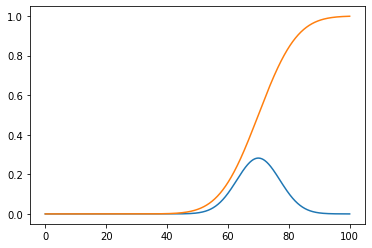

0.4012936743170763
0.3413447460685428


In [80]:
from scipy.special import erf
import matplotlib.pyplot as plt
%matplotlib inline


x = np.linspace(0,100,1000)
plt.figure()
plt.plot(x,1/np.sqrt(2*np.pi*2)*np.exp(-(x-70)**2/10**2))
plt.plot(x,1/2*(1+erf((x-70)/(10*sqrt(2)))))
plt.show()
from math import erf
print(1/2*(1+erf((19.5-20)/(2*sqrt(2)))))
print(1/2*(1+erf((22-20)/(2*sqrt(2))))-1/2*(1+erf((20-20)/(2*sqrt(2)))))


In [92]:

from math import erf,sqrt

mu = 70
sigma = 10

fail = 60
star = 80

print(100 - 100/2*(1+erf((star-mu)/(sigma*sqrt(2)))))
print(100 - 100/2*(1+erf((fail-mu)/(sigma*sqrt(2)))))
print(100/2*(1+erf((fail-1-mu)/(sigma*sqrt(2)))))



15.865525393145717
84.13447460685428
13.566606094638267


In [90]:
import math
mean, std = 70, 10
cdf = lambda x: 0.5 * (1 + math.erf((x - mean) / (std * (2 ** 0.5))))


print(round((1-cdf(80))*100,2))
print(round((1-cdf(60))*100,2))
print(round((cdf(60))*100,2))

15.87
84.13
15.87


In [96]:
len([[1,2],[3,1,4]][1])

3